## Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100
palette = sns.color_palette("Set3", n_colors=10)
col_var = "#fb8072"

## Load Dataset

In [36]:
df = pd.read_csv("../Dataset/Processed/raw_dataset.csv")

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (47939, 27)

Columns: ['age', 'gender', 'jaundice_history', 'receive_transfusion', 'liver_condition', 'injectable_drug_use', 'drug_use', 'alcohol_consumption', 'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol', 'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium', 'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality', 'hcv_status']


,age,gender,jaundice_history,receive_transfusion,liver_condition,injectable_drug_use,drug_use,alcohol_consumption,alt,albumin,...,glucose,total_bilirubin,total_calcium,total_protein,triglycerides,uric_acid,ldh,globulin,osmolality,hcv_status
0,15.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,25.0,4.3,...,78.0,0.6,9.7,7.0,50.0,6.7,149.0,2.7,279.0,NaN
1,85.0,2.0,NaN,9.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0,14.0,3.5,...,87.0,0.4,8.9,6.9,78.0,4.9,105.0,3.4,271.0,NaN
3,70.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,31.0,5.0,...,155.0,1.0,9.9,7.2,59.0,7.2,165.0,2.2,287.0,NaN
4,16.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,15.0,4.2,...,79.0,1.8,9.8,7.8,49.0,4.7,101.0,3.6,271.0,NaN


## Identify Numerical Columns

In [37]:
num_columns = ['age', 'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol', 'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium', 'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality']
df_num = df[num_columns]

cat_columns = ['gender', 'jaundice_history', 'receive_transfusion', 'liver_condition', 'injectable_drug_use', 'drug_use', 'alcohol_consumption', 'hcv_status']

df_cat = df[cat_columns].astype("category")

df_cat["gender"] = df_cat["gender"].replace({1: "Male", 2: "Female"})

df_cat["jaundice_history"] = df_cat["jaundice_history"].replace({1: "Yes", 2: "No"})
df_cat["receive_transfusion"] = df_cat["receive_transfusion"].replace({1: "Yes", 2: "No"})
df_cat["liver_condition"] = df_cat["liver_condition"].replace({1: "Yes", 2: "No"})
df_cat["injectable_drug_use"] = df_cat["injectable_drug_use"].replace({1: "Yes", 2: "No"})
df_cat["drug_use"] = df_cat["drug_use"].replace({1: "Yes", 2: "No"})
df_cat["alcohol_consumption"] = df_cat["alcohol_consumption"].replace({1: "Yes", 2: "No"})
df_cat["hcv_status"] = df_cat["hcv_status"].replace({0: "No", 1: "Yes"})

## Visualize Data Distribution - Before Outlier Removal

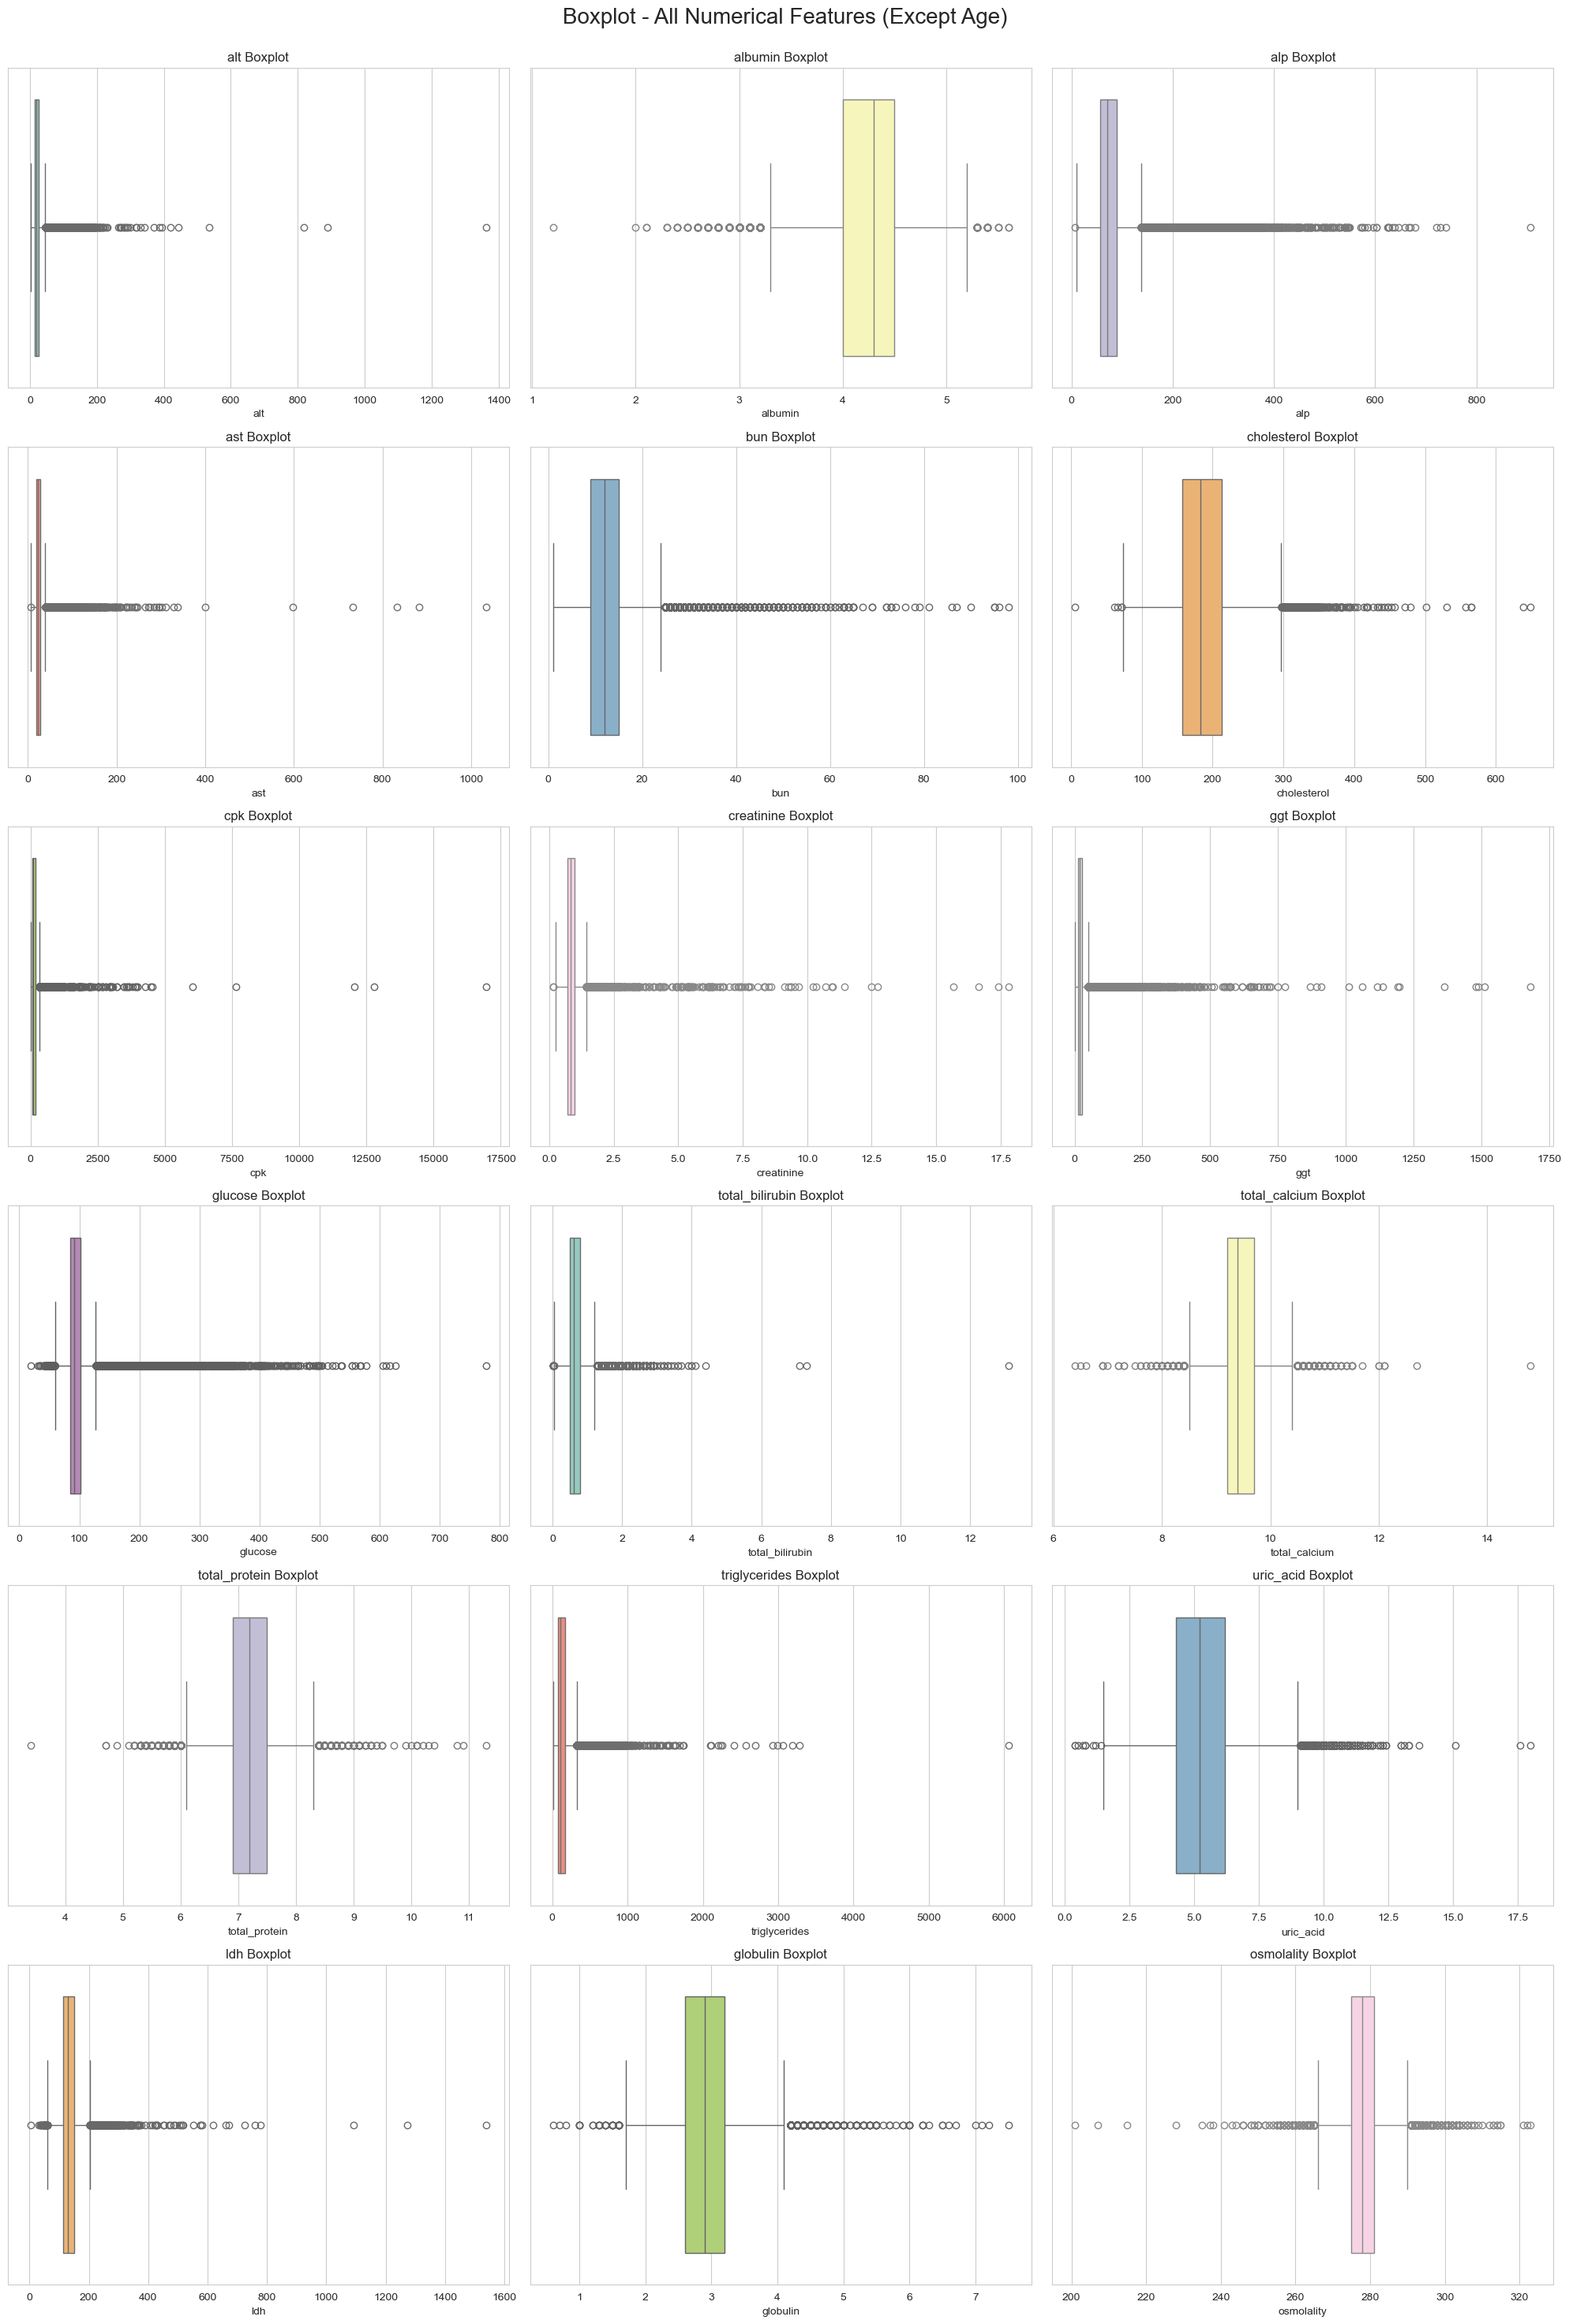

In [38]:
# Boxplot untuk semua kolom numerik kecuali age
num_columns_no_age = [col for col in num_columns if col != 'age']

cols = 3
rows = math.ceil(len(num_columns_no_age) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(num_columns_no_age):
    sns.boxplot(x=df[col], ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(f"{col} Boxplot")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplot - All Numerical Features (Except Age)", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Statistical Summary - Before Outlier Removal

In [39]:
print("="*80)
df[num_columns_no_age].describe().T

,count,mean,std,min,25%,50%,75%,max
alt,44261.0,23.930277,19.428976,2.00,15.00,19.00,27.00,1363.0
albumin,44361.0,4.247039,0.362635,1.20,4.00,4.30,4.50,5.6
alp,44352.0,83.460633,53.673380,7.00,57.00,70.00,89.00,907.0
ast,44237.0,25.084635,15.773403,6.00,19.00,22.00,27.00,1034.0
bun,44353.0,13.083399,5.826833,1.00,9.00,12.00,15.00,98.0
cholesterol,44350.0,186.953371,42.546850,6.00,157.00,183.00,213.00,649.0
cpk,24657.0,163.531208,258.361543,6.00,76.00,112.00,179.00,16959.0
creatinine,44357.0,0.872496,0.420421,0.14,0.69,0.82,0.99,17.8
ggt,44351.0,26.938040,40.259592,2.00,13.00,18.00,28.00,1681.0
glucose,44358.0,100.255895,36.888812,19.00,85.00,92.00,102.00,777.0


## Remove Outliers

In [40]:
print(f"Dataset sebelum remove outliers: {df.shape}")
print("="*80)

df_clean = df.copy()

for col in num_columns_no_age:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before removal
    outliers_count = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
    
    # Remove outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    print(f"{col:20s}: {outliers_count:5d} outliers removed (range: {lower_bound:8.2f} - {upper_bound:8.2f})")

print("="*80)
print(f"Dataset setelah remove outliers: {df_clean.shape}")
print(f"Total rows removed: {df.shape[0] - df_clean.shape[0]}")
print(f"Percentage of data removed: {((df.shape[0] - df_clean.shape[0]) / df.shape[0]) * 100:.2f}%")

Dataset sebelum remove outliers: (47939, 27)
alt                 :  2893 outliers removed (range:    -3.00 -    45.00)
albumin             :   570 outliers removed (range:     3.25 -     5.25)
alp                 :  3179 outliers removed (range:     8.00 -   136.00)
ast                 :  1198 outliers removed (range:     8.50 -    36.50)
bun                 :  1103 outliers removed (range:     1.00 -    25.00)
cholesterol         :   457 outliers removed (range:    78.00 -   294.00)
cpk                 :  1398 outliers removed (range:   -69.00 -   315.00)
creatinine          :   376 outliers removed (range:     0.28 -     1.35)
ggt                 :  1260 outliers removed (range:    -5.00 -    43.00)
glucose             :  1437 outliers removed (range:    61.00 -   125.00)
total_bilirubin     :   631 outliers removed (range:    -0.05 -     1.15)
total_calcium       :    99 outliers removed (range:     8.35 -    10.35)
total_protein       :   360 outliers removed (range:     6.15 -    

## Visualize Data Distribution - After Outlier Removal

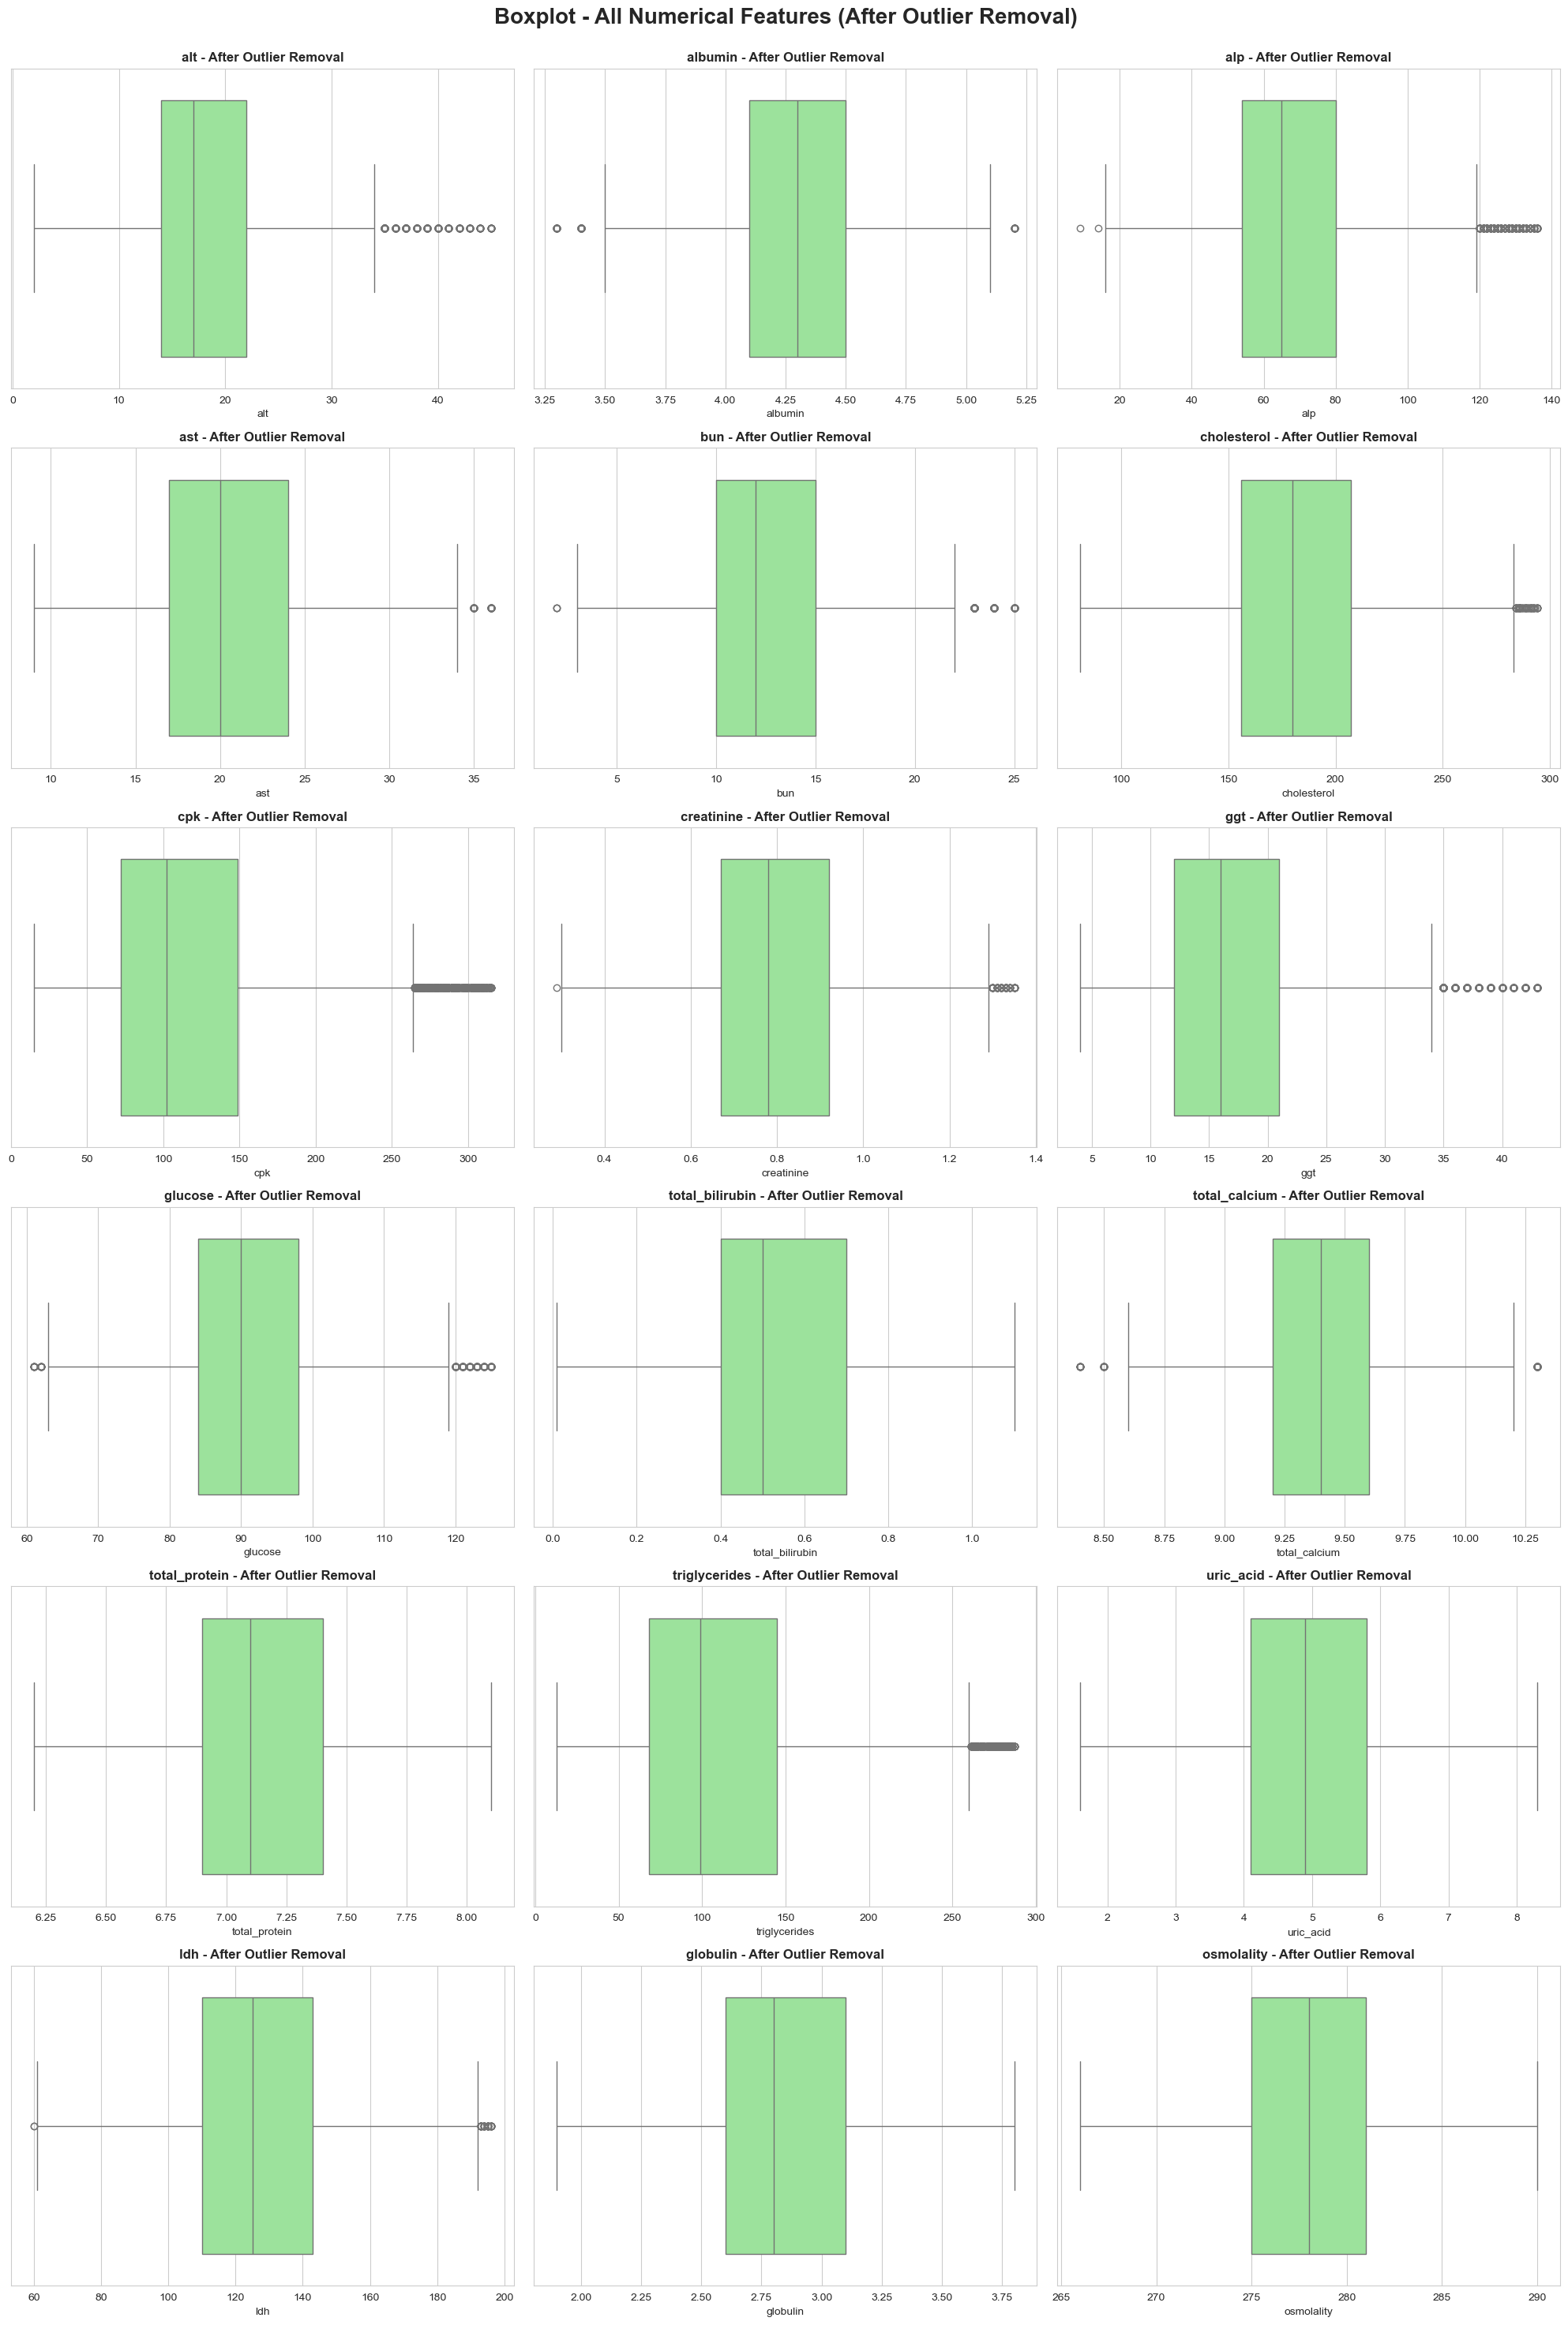

In [41]:
# Boxplot setelah outlier removal
cols = 3
rows = math.ceil(len(num_columns_no_age) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(num_columns_no_age):
    sns.boxplot(x=df_clean[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f"{col} - After Outlier Removal", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplot - All Numerical Features (After Outlier Removal)", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Save Cleaned Dataset

In [42]:
output_path = "../Dataset/cleaned_dataset.csv"
df_clean.to_csv(output_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_path}")
print(f"Final dataset shape: {df_clean.shape}")

Dataset berhasil disimpan ke: ../Dataset/cleaned_dataset.csv
Final dataset shape: (12483, 27)
